In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz

In [3]:
# input crisp
input_kualitas_makanan = float(input("Kualitas Makanan\t:"))
input_kecepatan_layanan = float(input("Kualitas Kecepatan Layanan\t:"))

In [10]:
# Generate universe variables
x_kualitas_makanan = np.arange(0, 11, 1)
x_kecepatan_layanan = np.arange(0, 31, 1)
x_tingkat_kepuasan = np.arange(0, 11, 1)

In [11]:
# Generate fuzzy membership functions
kualitas_makanan_buruk = fuzz.trapmf(x_kualitas_makanan, [0, 0, 2, 4])
kualitas_makanan_sedang = fuzz.trapmf(x_kualitas_makanan, [2, 4, 5, 7])
kualitas_makanan_baik = fuzz.trapmf(x_kualitas_makanan, [5, 7, 10, 10])

kecepatan_layanan_cepat = fuzz.trapmf(x_kecepatan_layanan, [0, 0, 5, 20])
kecepatan_layanan_lambat = fuzz.trapmf(x_kecepatan_layanan, [5, 20, 30, 30]) 


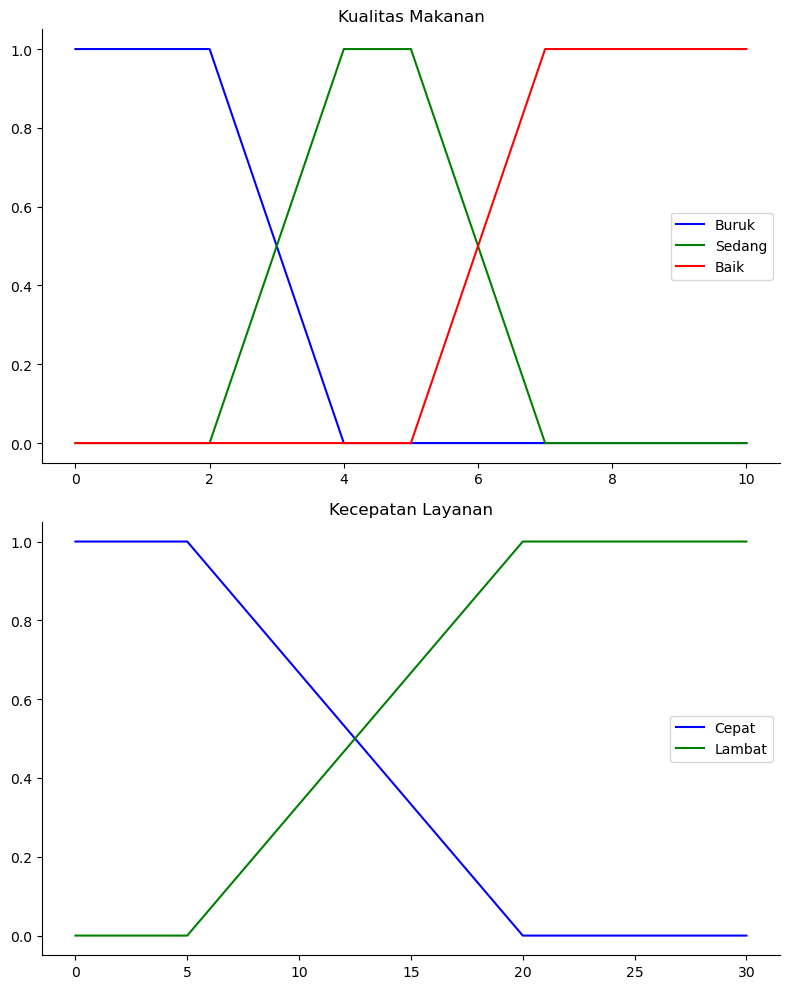

In [12]:
# Visualize
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 10))

ax0.plot(x_kualitas_makanan, kualitas_makanan_buruk, 'b', linewidth=1.5, label='Buruk')
ax0.plot(x_kualitas_makanan, kualitas_makanan_sedang, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_kualitas_makanan, kualitas_makanan_baik, 'r', linewidth=1.5, label='Baik')
ax0.set_title('Kualitas Makanan')
ax0.legend()

ax1.plot(x_kecepatan_layanan, kecepatan_layanan_cepat, 'b', linewidth=1.5, label='Cepat')
ax1.plot(x_kecepatan_layanan, kecepatan_layanan_lambat, 'g', linewidth=1.5, label='Lambat')
ax1.set_title('Kecepatan Layanan')
ax1.legend()  

for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()  

In [13]:
# Fuzzification
def fuzzification(crisp_kualitas_makanan, crisp_kecepatan_layanan):
    kualitas_makanan = [
        fuzz.interp_membership(x_kualitas_makanan, kualitas_makanan_buruk, crisp_kualitas_makanan),
        fuzz.interp_membership(x_kualitas_makanan, kualitas_makanan_sedang, crisp_kualitas_makanan),
        fuzz.interp_membership(x_kualitas_makanan, kualitas_makanan_baik, crisp_kualitas_makanan),
    ]
    
    kecepatan_layanan = [
        fuzz.interp_membership(x_kecepatan_layanan, kecepatan_layanan_cepat, crisp_kecepatan_layanan),
        fuzz.interp_membership(x_kecepatan_layanan, kecepatan_layanan_lambat, crisp_kecepatan_layanan),
    ]
    
    return kualitas_makanan, kecepatan_layanan

In [14]:
# Inference
def inference(fuzz_kualitas_makanan, fuzz_kecepatan_layanan):
    rule_tidak_puas = max(
        min(fuzz_kualitas_makanan[0], fuzz_kecepatan_layanan[0]),
        min(fuzz_kualitas_makanan[0], fuzz_kecepatan_layanan[1]),
        min(fuzz_kualitas_makanan[1], fuzz_kecepatan_layanan[1]),
    )
    rule_puas = max(
        min(fuzz_kualitas_makanan[1], fuzz_kecepatan_layanan[0]),
        min(fuzz_kualitas_makanan[2], fuzz_kecepatan_layanan[1]),
        min(fuzz_kualitas_makanan[2], fuzz_kecepatan_layanan[0]),
    )
    return rule_tidak_puas, rule_puas

In [ ]:
# Defuzzification
def deffuzification(infer_puas, infer_tidak_puas):
    

In [15]:
def defuzzification(tidak_puas, puas):
    r_tidak_puas =  3
    r_puas = 8

    # Weighted average (Sugeno)
    numerator = tidak_puas * r_tidak_puas + puas * r_puas
    denominator = tidak_puas + puas

    if denominator == 0:
        return 0
    else:
        return numerator / denominator


In [17]:
fuzzval_kualitas_makanan, fuzzval_kecepatan_layanan = fuzzification(input_kualitas_makanan, input_kecepatan_layanan)

inferval_tidak_puas, inferval_puas = inference(fuzzval_kualitas_makanan, fuzzval_kecepatan_layanan)

result = defuzzification(inferval_tidak_puas, inferval_puas)

In [18]:
result

6.947368421052633